<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Artificial Intelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [ ]:
model = KMeans(n_clusters=4, random_state=0)

In [ ]:
model.fit(x)

In [ ]:
y_ = model.predict(x)

In [ ]:
y_

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforcement Learning

In [3]:
# State Space with prior of 80%
ssp = [1, 1, 1, 1, 0]

In [20]:
# Action Space  50%
asp = [1, 0]

In [21]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [22]:
rl = np.array([epoch() for _ in range(15)])
rl

array([50, 50, 62, 55, 49, 55, 54, 56, 54, 50, 50, 54, 46, 57, 57])

In [7]:
rl.mean()

50.46666666666667

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [49]:
def epoch():
    tr = 0
    asp = [1, 0]  #Resets each time the action space before starting
    for _ in range(10000):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
            asp.append(s)   # The book kept it of 'if' construct. That literally defeats the purpose of Reward being given
    return tr

In [50]:
# I don't think that this code below does some literal learning.
# Actually, learning is done in the 100 iterations above and not here
# This is just repition of same thing many times. 

rl = np.array([epoch() for _ in range(15)])
rl

array([7984, 7960, 7991, 7907, 7943, 8063, 7888, 7917, 7893, 7989, 7953,
       7758, 8033, 8040, 7717])

In [52]:
rl.mean()

7935.733333333334

## Supervised Learning

### OLS Regression

In [122]:
# The degree of X used here will be the solution at last through OLS 
# MSE will only be zero in all cases >= degree used  

def f(x):
    return 6 * x ** 3 + x ** 4 / 5

In [123]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [124]:
y = f(x)
y

array([-44.8   , -30.2805, -19.2375, -11.2305,  -5.8   ,  -2.468 ,
        -0.7375,  -0.093 ,   0.    ,   0.0945,   0.7625,   2.5945,
         6.2   ,  12.207 ,  21.2625,  34.032 ,  51.2   ,  73.4695,
       101.5625, 136.2195, 178.2   , 228.282 , 287.2625, 355.957 ,
       435.2   ])

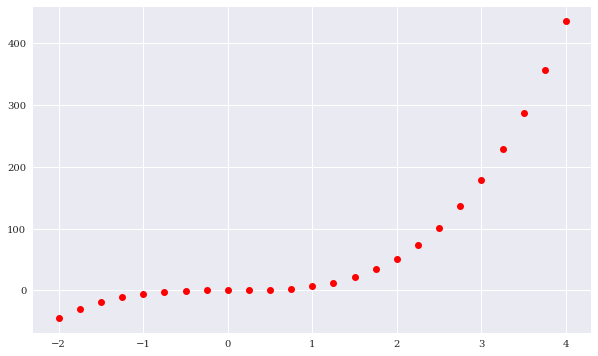

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [126]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

58.495000000000005

In [127]:
alpha = y.mean() - beta * x.mean()
alpha

13.899374999999992

In [128]:
y_ = alpha + beta * x

In [129]:
MSE = ((y - y_) ** 2).mean()
MSE
# A high value of MSE tells us that this method is not a good one for this case
# Ideally, MSE should be 0

4624.543679589844

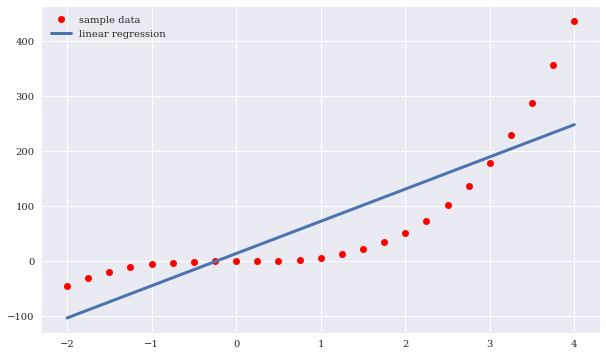

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

# We can use this method to approximate our price curves to appropriate polynomial degree
# But, for that, I beleive to separate the market states first 
# Because, markets behave different (& hence different deg of mononials) shall fit in. 

deg=1 | MSE=4624.54368
deg=2 | MSE=964.41446
deg=3 | MSE=2.01194
deg=4 | MSE=0.00000


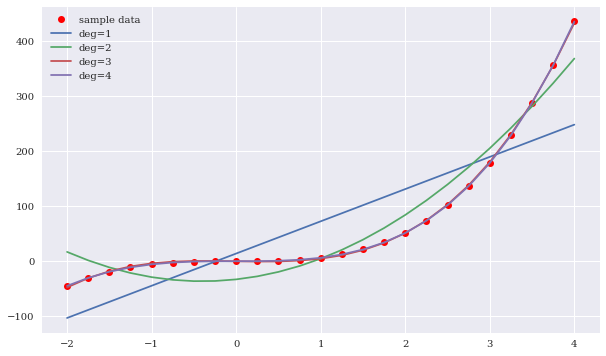

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3, 4]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, y_, label=f'deg={deg}')
plt.legend();

In [132]:
reg

array([ 0.2,  6. ,  0. ,  0. , -0. ])

## Neural Network &mdash; `sklearn`

In [133]:
from sklearn.neural_network import MLPRegressor

In [134]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000, random_state=1000)

In [135]:
%time model.fit(x.reshape(-1, 1), y)

Wall time: 1.32 s


MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000, random_state=1000)

In [ ]:
y_ = model.predict(x.reshape(-1, 1))

In [137]:
MSE = ((y - y_) ** 2).mean()
MSE

31.15661774866601

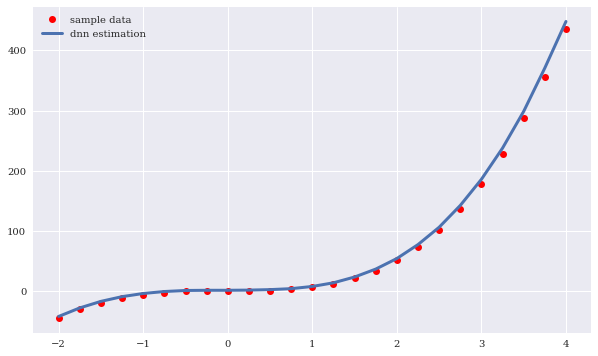

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [156]:
import tensorflow as tf
tf.random.set_seed(100)

In [157]:
from keras.layers import Dense       # DNN -- Dense Neural Network
from keras.models import Sequential  # We are using sequential model

In [158]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [159]:
((y - y_) ** 2).mean()

31569.124511212565

round=1 | MSE=19494.15804
round=2 | MSE=17134.03529
round=3 | MSE=14079.79427
round=4 | MSE=10715.70369
round=5 | MSE=7539.82075
round=6 | MSE=5170.69516
round=7 | MSE=4021.09428
round=8 | MSE=3623.08959
round=9 | MSE=3306.40527
round=10 | MSE=3028.49111
round=11 | MSE=2784.54507
round=12 | MSE=2623.73232
round=13 | MSE=2495.16764
round=14 | MSE=2339.04652
round=15 | MSE=2184.23295
round=16 | MSE=2004.55931
round=17 | MSE=1795.42387
round=18 | MSE=1563.79861
round=19 | MSE=1341.43689
round=20 | MSE=1142.83072
round=21 | MSE=961.89516
round=22 | MSE=800.02046
round=23 | MSE=666.96506
round=24 | MSE=552.00798
round=25 | MSE=457.11383
round=26 | MSE=377.14943
round=27 | MSE=310.59245
round=28 | MSE=258.36551
round=29 | MSE=214.29954
round=30 | MSE=183.22419
round=31 | MSE=158.03167
round=32 | MSE=139.68484
round=33 | MSE=126.22194
round=34 | MSE=115.01795
round=35 | MSE=93.78379
round=36 | MSE=61.96475
round=37 | MSE=40.07158
round=38 | MSE=29.76892
round=39 | MSE=25.25841
round=40 | MSE=

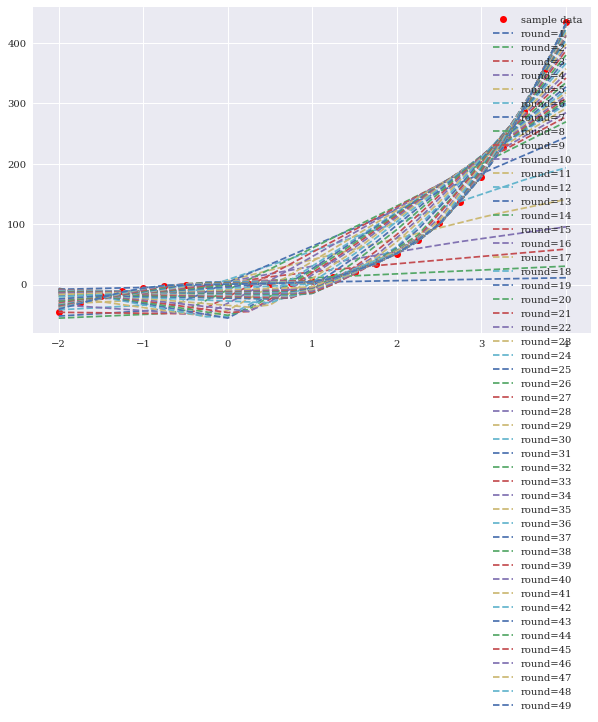

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 50):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

First, Using OLS Method

In [163]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

[-1.     -0.9592 -0.9184 -0.8776 -0.8367 -0.7959 -0.7551 -0.7143 -0.6735
 -0.6327 -0.5918 -0.551  -0.5102 -0.4694 -0.4286 -0.3878 -0.3469 -0.3061
 -0.2653 -0.2245 -0.1837 -0.1429 -0.102  -0.0612 -0.0204  0.0204  0.0612
  0.102   0.1429  0.1837  0.2245  0.2653  0.3061  0.3469  0.3878  0.4286
  0.4694  0.5102  0.551   0.5918  0.6327  0.6735  0.7143  0.7551  0.7959
  0.8367  0.8776  0.9184  0.9592  1.    ]


In [162]:
len(x)

50

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


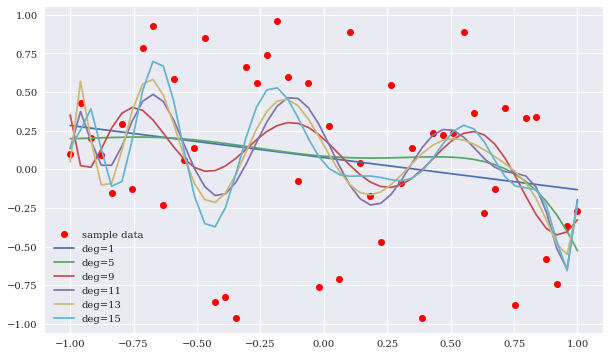

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

Now, Using Tensor Flow Keras Sequential Model

In [166]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [167]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               512       
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


round=1 | MSE=0.00219
round=2 | MSE=0.00278
round=3 | MSE=0.00058
round=4 | MSE=0.01046
round=5 | MSE=0.00765
round=6 | MSE=0.00149
round=7 | MSE=0.00037
Wall time: 23.9 s


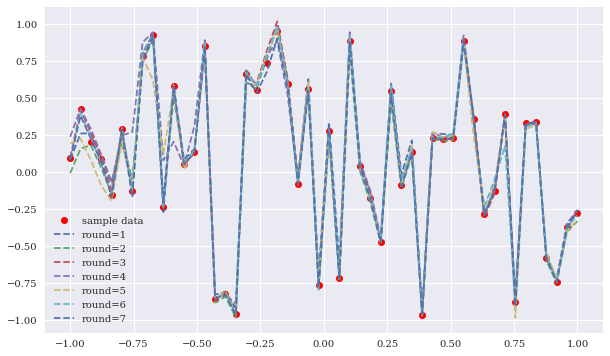

In [169]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Importance of Big Data

In [171]:
f = 5  # Number of Features 
n = 10  # N numbers in each

In [172]:
np.random.seed(100)

In [173]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [175]:
y = np.random.randint(0, 2, n)   # Creating Label Data for checking and updation of model
y

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [176]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [177]:
h = model.fit(x, y, epochs=50, verbose=False)

In [178]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [179]:
y == y_

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True])

In [180]:
res = pd.DataFrame(h.history)

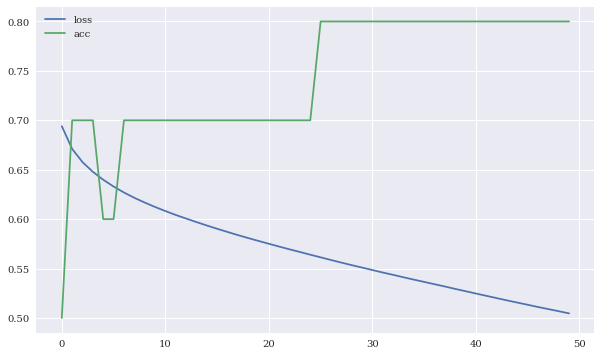

In [181]:
res.plot(figsize=(10, 6));

Increasing the Number of Features & Rows to scalable extend

In [182]:
f = 10   # Features to 10
n = 250   # Number to 250 each

In [183]:
np.random.seed(100)

In [205]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]])

In [185]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [186]:
2 ** f

1024

In [187]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [188]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y    # Creating the LABEL column from where the network will learn by comparism

In [190]:
data#.info()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,l
0,0,0,1,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,1,1
2,0,1,0,0,0,1,1,1,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0
4,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,1,0,0,0,1,1
247,0,0,0,0,1,1,1,0,0,1,1
248,0,1,1,1,1,0,0,0,1,0,0


In [213]:
grouped = data.groupby(list(data.columns))
grouped.size()

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  l
0   0   0   0   0   0   0   1   1   1   1    1
                        1   0   1   0   0    1
                                        1    1
                                    1   1    1
                    1   0   0   0   0   0    1
                                            ..
1   1   1   1   1   0   0   0   0   0   1    1
                            1   0   0   0    1
                        1   1   0   0   1    1
                    1   1   0   0   0   0    1
                            1   0   1   1    2
Length: 239, dtype: int64

In [216]:
freq = grouped['l'].size().unstack(fill_value=0)
freq

l                              0  1
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9      
0  0  0  0  0  0  0  1  1  1   0  1
                  1  0  1  0   1  1
                           1   0  1
               1  0  0  0  0   1  0
                           1   0  1
...                           .. ..
1  1  1  1  1  0  0  0  0  0   0  1
                     1  0  0   1  0
                  1  1  0  0   0  1
               1  1  0  0  0   1  0
                     1  0  1   0  2

[227 rows x 2 columns]

In [217]:
freq['sum'] = freq[0] + freq[1]

In [218]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [219]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int32

Now, Using SkLearn Neural Network

In [220]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [221]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [222]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [224]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

Now, Let's divide the data into TRAINING & TEST Sets

In [228]:
split = int(len(data) * 0.7)
split

175

In [229]:
train = data[:split]
test = data[split:]

In [230]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [231]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [232]:
accuracy_score(test['l'], model.predict(test[fcols]))  # Due to the small training data set, we can see that it has not predicted the patterns with acceptable accuracy

0.38666666666666666

# Let's ENLARGE the data set

In [283]:
factor = 50

In [298]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)
big

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,1,0,0,0,1,1,1,0,0,0
1,1,1,1,0,1,1,0,1,1,1
2,0,1,0,0,1,0,1,0,0,0
3,1,0,1,0,1,1,1,0,0,0
4,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
12495,1,1,1,1,0,1,0,1,1,1
12496,0,0,1,1,0,0,1,0,1,0
12497,0,0,0,1,0,0,1,1,0,1
12498,1,0,0,0,0,1,0,1,0,0


In [309]:
big['l'] = np.random.randint(0, 2, factor * n)   #Labels appropriately

In [310]:
train = big[:split]
test = big[split:]

In [314]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [315]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.96

In [316]:
accuracy_score(test['l'], model.predict(test[fcols]))
# We are getting a stagnant accuracy of 50% because of the label data as generated one with 1&0s only 
#  This makes it now at par with the uninformed base Algorithim 

0.49809330628803244

In [271]:
grouped = big.groupby(list(data.columns))

In [272]:
freq = grouped['l'].size().unstack(fill_value=0)

In [273]:
freq['sum'] = freq[0] + freq[1]

In [274]:
freq.head(6)

l                                0    1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9               
0  0  0  0  0  0  0  0  0  0   377  407  784
                           1   352  383  735
                        1  0   332  366  698
                           1   347  371  718
                     1  0  0   360  352  712
                           1   391  338  729

In [275]:
freq['sum'].describe().astype(int)

count    1024
mean      732
std        26
min       641
25%       715
50%       732
75%       750
max       806
Name: sum, dtype: int32

In [263]:
8 ** 25

37778931862957161709568

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>